# KNN Project

### We'll use the famous iris data set for this project. It's a small data set with flower features that can be used to attempt to predict the species of an iris flower.

In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

# Get the Data

In [2]:
#Reading in the data
iris = pd.read_csv('iris.csv')
iris.drop(['Unnamed: 0'],axis=1,inplace=True)

In [3]:
#Check the head of the iris Data Frame
iris.head(6)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


# Standardize Data

In [4]:
#Standardize the Variables
scaler = StandardScaler()
scaler.fit(iris.drop('Species',axis=1))
scaled_features = scaler.transform(iris.drop('Species',axis=1))

In [5]:
#Converting the scaled features to a dataframe and Checking that the scaling worked.
df_feat = pd.DataFrame(scaled_features,columns=iris.columns[:-1])
df_feat.head(6)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
5,-0.537178,1.939791,-1.169714,-1.052180


# Train and Test Splits

In [6]:
#Splitting the data into train and test sets (70/30 split)
x_train, x_test, y_train, y_test = train_test_split(df_feat,iris['Species'],test_size=0.30,random_state=101)

# Build a KNN model

In [7]:
#Use the knn function to predict Species of the test set (k=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [8]:
#Misclassification rate
y_pred = knn.predict(x_test)
error_rate = (np.mean(y_pred != y_test))
print ("Misclassification rate: ",error_rate*100, "%")

Misclassification rate:  4.44444444444 %


# Choosing a K Value

In [9]:
#Creating a plot of the error (misclassification) rate for k values ranging from 1 to 10
error_rate = []

for i in range(1,11):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_pred != y_test))

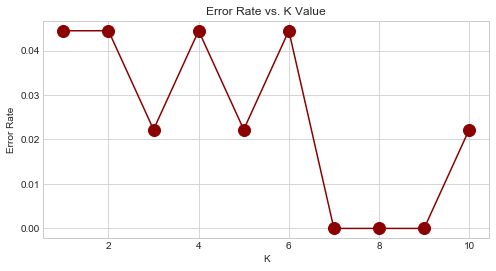

In [10]:
plt.figure(figsize=(8,4))
plt.plot(range(1,11),error_rate,color='darkred', marker='o',markersize=12)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [11]:
#Performance of the model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

a = np.mean(y_pred == y_test)
print('accuracy: ',a*100,"%")

accuracy:  100.0 %


In [16]:
print(np.array(y_test))

['setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa'
 'setosa' 'virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'setosa'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'setosa'
 'setosa' 'versicolor' 'versicolor']


In [17]:
print(np.array(y_pred))

['setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa'
 'setosa' 'virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'setosa'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'setosa'
 'setosa' 'versicolor' 'versicolor']
